In [1]:
#bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:

dados = pd.read_csv(r'C:\Users\Samsung\Desktop\Dados_Indendio.csv', encoding='latin1')

In [4]:
dados.shape

(6454, 5)

In [5]:
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [7]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [9]:
#transformar date em datetime
dados['date'] = pd.to_datetime(dados['date'])

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [11]:
dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [12]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [41]:
#agrupar por ano
anos = dados.groupby('year').sum().reset_index()

anos

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


Text(0.5, 1.0, 'Número de incêndios por ano')

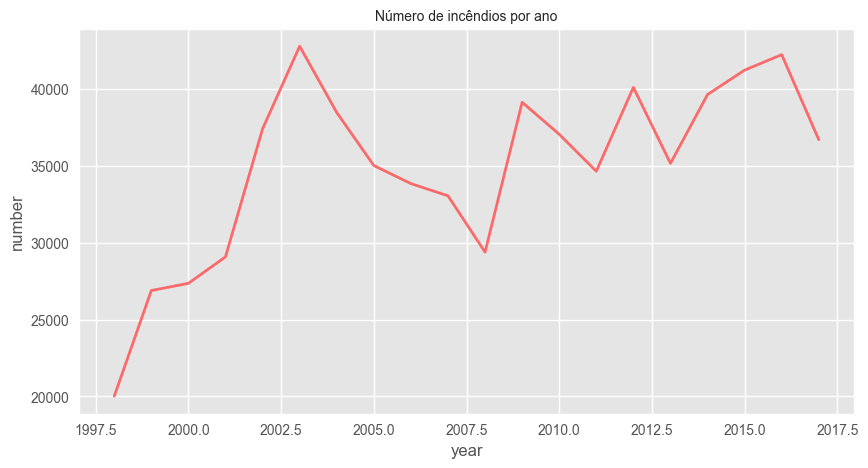

In [42]:
#grafico de icendios por ano
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(x='year', y='number', data=anos, lw=2,estimator='sum', color='#ff5555', alpha=0.85)
plt.title('Número de incêndios por ano', fontsize=10)

In [43]:
meses = dados.groupby(by =['year', 'month']).sum().reset_index()
meses

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000
...,...,...,...
234,2017,Maio,2506.000
235,2017,Março,2017.000
236,2017,Novembro,6217.379
237,2017,Outubro,3600.159


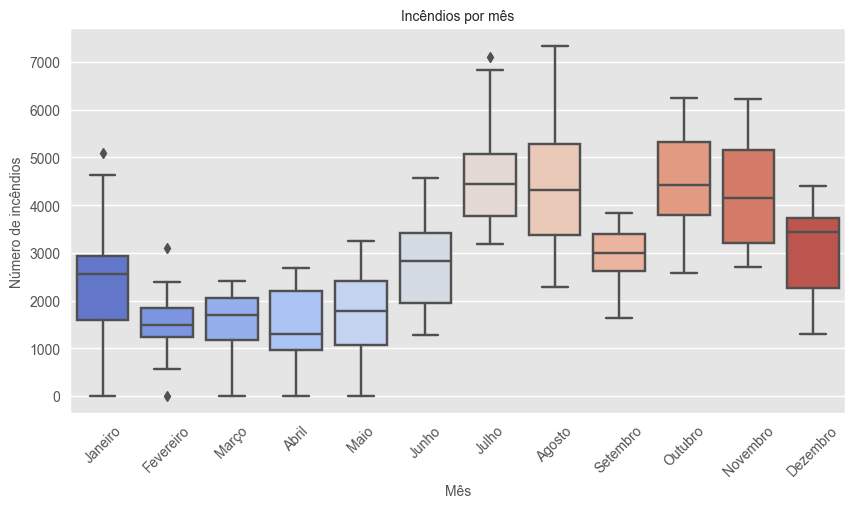

In [49]:
#boxplot dos meses
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='number', data=meses, palette='coolwarm', order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
plt.title('Incêndios por mês', fontsize=10)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Número de incêndios', fontsize=10)
plt.xticks(rotation=45);

In [52]:
#agrupar por estado
estados = dados.groupby('state').sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=False )
estados.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


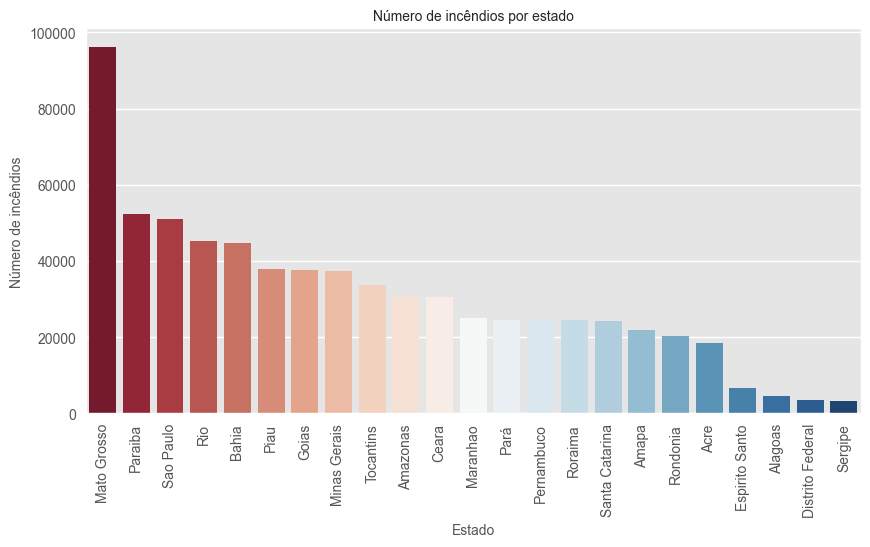

In [73]:
#plotar o grafico de barras
plt.figure(figsize=(10,5))
sns.barplot(x='state', y='number', data=estados, palette='RdBu')
plt.xticks(rotation=90);
plt.xlabel('Estado', fontsize=10)
plt.ylabel('Número de incêndios', fontsize=10)
plt.title('Número de incêndios por estado', fontsize=10);

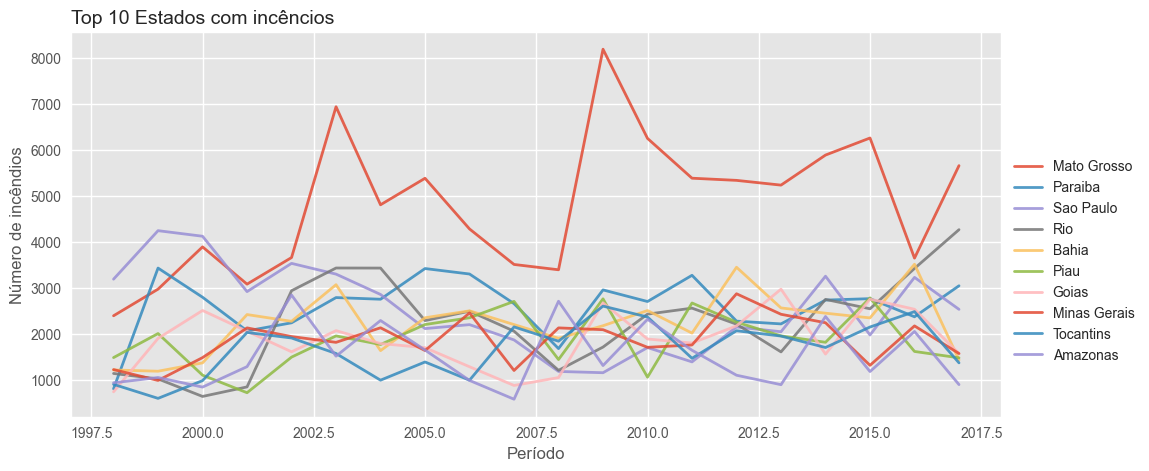

In [96]:
# Estados TOP 10
Lista_TOP10 = estados['state'][0:10].values

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'Top 10 Estados com incêncios', loc='left', fontsize=14 )

# Loop
for Coluna in Lista_TOP10:
  
  # Filtrar o estado
  Filtro = dados.loc[ dados['state'] == Coluna ]

  # Agrupar os valores para sumarizar
  Analise_Local = Filtro.groupby( by=['year'] ).sum().reset_index()

  # Plot
  sns.lineplot(data=Analise_Local, x='year', y='number', lw=2, alpha=0.85)

# Labels
plt.xlabel('Período')
plt.ylabel('Número de incêndios')

# Legenda
plt.legend( Lista_TOP10, bbox_to_anchor=(1, 0.7) );
